# 1. importation des libreries

In [1]:
# importation des libreries
import numpy as np
import pandas as pd

# 2. chargement des données

In [2]:
# chargement des données
data = pd.read_csv('Data/studentscores.csv')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# 3 anayse des données

In [4]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data['Hours'].max()

np.float64(9.2)

In [9]:
data['Hours'].max()

np.float64(9.2)

In [10]:
print(data['Hours'].max())

9.2


In [11]:
print('score max :', data['Scores'].max())

score max : 95


In [12]:
print('score min :', data['Scores'].min())

score min : 17


# 4 division des donnée 

In [13]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


variable indépendante et variable dépendante

In [62]:
x= data.iloc[ : , :-1 ].values
y= data.iloc[ : , -1 ].values

In [63]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [22]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

4.1 separation des données : Train et Test

In [23]:
# x_train, x_test, y_train, y_test
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=40)

In [26]:
print('x-train shape :',x_train.shape)
print('x-test shape :',x_test.shape)
print('y-train shape :',y_train.shape)
print('y-test shape :',x_test.shape)

x-train shape : (18, 1)
x-test shape : (7, 1)
y-train shape : (18,)
y-test shape : (7, 1)


# 5 construire le modèle

In [27]:
# importer l'algorithme de la regression linear
from sklearn.linear_model import LinearRegression

In [28]:
modele_lineaire=LinearRegression()

In [30]:
# entrainement du modèle
modele_lineaire.fit(x_train, y_train)

LinearRegression()

In [31]:
# faire la prédiction
y_scores_predits=modele_lineaire.predict(x_test)

In [32]:
y_scores_predits

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

In [33]:
y_test

array([95, 86, 17, 69, 42, 75, 54])

In [54]:
resultats=pd.DataFrame({'y-score réel':y_test, 'y-score predit':y_scores_predits})

In [55]:
resultats

,y-score réel,y-score predit
0,95,90.348621
1,86,79.201258
2,17,11.303688
3,69,75.147672
4,42,33.598413
5,75,86.295034
6,54,48.799361


In [39]:
# evaluation du modele
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
print('MSE de la regression linéaire :', mean_squared_error(y_test, y_scores_predits))

MSE de la regression linéaire : 51.90159659147337


In [42]:
print('R2 de la regression linéaire :', r2_score(y_test, y_scores_predits))

R2 de la regression linéaire : 0.9168569951293908


# 6 visualisation de resultats

In [43]:
import matplotlib.pyplot as plt

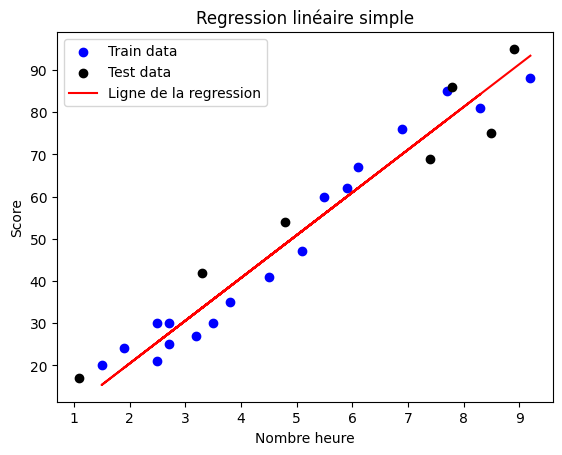

In [50]:
plt.scatter(x_train, y_train, color='blue', label='Train data')
plt.scatter(x_test, y_test, color='black', label='Test data')
#plt.plot(x_test, y_scores_predits, color='red', label='Ligne de la regression')
plt.plot(x_train, modele_lineaire.predict(x_train), color='red', label='Ligne de la regression')
plt.xlabel('Nombre heure')
plt.ylabel('Score')
plt.title('Regression linéaire simple')
plt.legend()
plt.show()

In [51]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [59]:
resultats=pd.DataFrame({'y-score réel':y_test, 'y-score predit':y_scores_predits})

In [60]:
resultats

,y-score réel,y-score predit
0,95,90.348621
1,86,79.201258
2,17,11.303688
3,69,75.147672
4,42,33.598413
5,75,86.295034
6,54,48.799361


# 7 prediction simple

In [58]:
print(modele_lineaire.predict([[10]]))

[101.49598285]


In [61]:
difference=y_test-y_scores_predits
resultats=pd.DataFrame({'y-score réel':y_test, 'y-score predit':y_scores_predits, 'différence':difference})
resultats

,y-score réel,y-score predit,différence
0,95,90.348621,4.651379
1,86,79.201258,6.798742
2,17,11.303688,5.696312
3,69,75.147672,-6.147672
4,42,33.598413,8.401587
5,75,86.295034,-11.295034
6,54,48.799361,5.200639
